In [10]:
from numpy import array, arange
from scipy.interpolate import interpolate
import pandas as pd

In [7]:
from material import Material
from disk import Disk

In [8]:
material = Material('10Х11Н20ТЗР',
                            {
                                "density": 8400,
                                "alpha": 18 * 10 ** -6,
                                "E": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                          array([1.74, 1.66, 1.57, 1.47, 1.32]) * 10 ** 11,
                                                          kind='cubic', bounds_error=False, fill_value='extrapolate'),
                                "mu": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                           [0.384, 0.379, 0.371, 0.361, 0.347],
                                                           kind='cubic', bounds_error=False, fill_value='extrapolate'),
                                "sigma_temp": 900 * 10 ** 6
                            })

C:\Users\parkh\AppData\Local\Temp\ipykernel_25092\1643029508.py:5: DeprecationWarning: Please import `interp1d` from the `scipy.interpolate` namespace; the `scipy.interpolate.interpolate` namespace is deprecated and will be removed in SciPy 2.0.0.
  "E": interpolate.interp1d(arange(400, 800 + 1, 100),
C:\Users\parkh\AppData\Local\Temp\ipykernel_25092\1643029508.py:8: DeprecationWarning: Please import `interp1d` from the `scipy.interpolate` namespace; the `scipy.interpolate.interpolate` namespace is deprecated and will be removed in SciPy 2.0.0.
  "mu": interpolate.interp1d(arange(400, 800 + 1, 100),


In [9]:
radius = array([20, 26, 30.62, 37.26, 56.94, 60.67, 72.95, 75.95, 102.41, 106.52, 109.82]) / 1000
thickness = array([36, 36, 15.43, 11.27, 10, 12, 12, 8, 6, 11, 11]) / 1000
nholes, rholes, dholes = [5], [66.8 / 1000], [6.2 / 1000]

In [11]:
print(pd.DataFrame({'radius': radius, 'thickness': thickness}))

     radius  thickness
0   0.02000    0.03600
1   0.02600    0.03600
2   0.03062    0.01543
3   0.03726    0.01127
4   0.05694    0.01000
5   0.06067    0.01200
6   0.07295    0.01200
7   0.07595    0.00800
8   0.10241    0.00600
9   0.10652    0.01100
10  0.10982    0.01100


In [12]:
rotation_frequency = 2806.2
temperature0 = 293.15
pressure = (0, 120.6 * 10 ** 6)
temperature = (350, 650)

In [18]:
disk = Disk(material=material,
            radius=radius, thickness=thickness,
            nholes=nholes, rholes=rholes, dholes=dholes)
condition = dict(rotation_frequency=rotation_frequency, temperature0=temperature0, pressure=pressure, temperature=temperature)

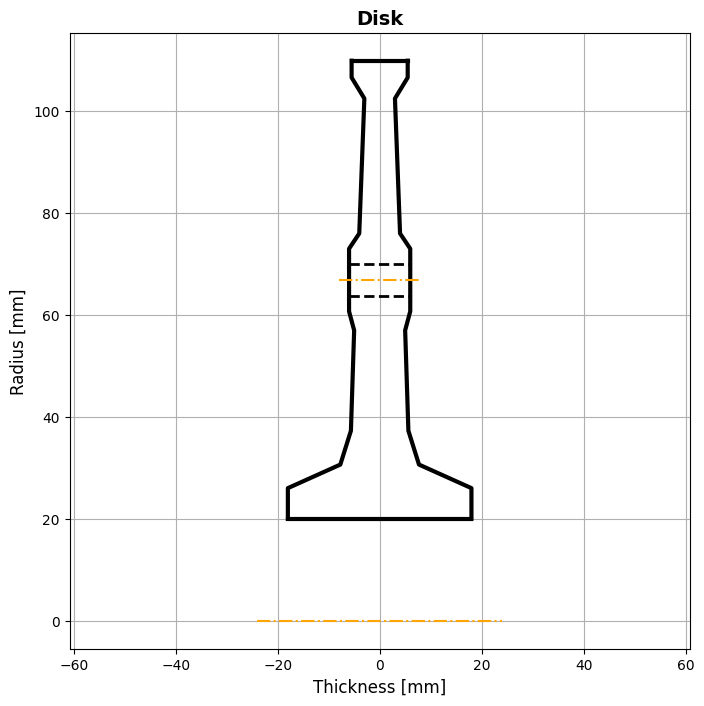

In [19]:
disk.show()

    radius [mm]  thickness [mm]  tension [MPa]   tension_t   tension_r
99       109.49            11.0     324.108433 -246.519175  120.600000
98       109.16            11.0     321.452651 -240.911292  124.091116
97       108.83            11.0     319.024696 -235.497368  127.572532
96       108.50            11.0     316.645286 -230.087091  131.044213
95       108.17            11.0     314.315630 -224.680820  134.506126
..          ...             ...            ...         ...         ...
4         22.40            36.0     565.878344  595.206379   64.118017
3         21.80            36.0     587.197294  610.676899   50.179761
2         21.20            36.0     610.592049  627.316168   34.949511
1         20.60            36.0     636.328593  645.271457   18.279625
0         20.00            36.0     664.712454  664.712454    0.000000

[100 rows x 5 columns]


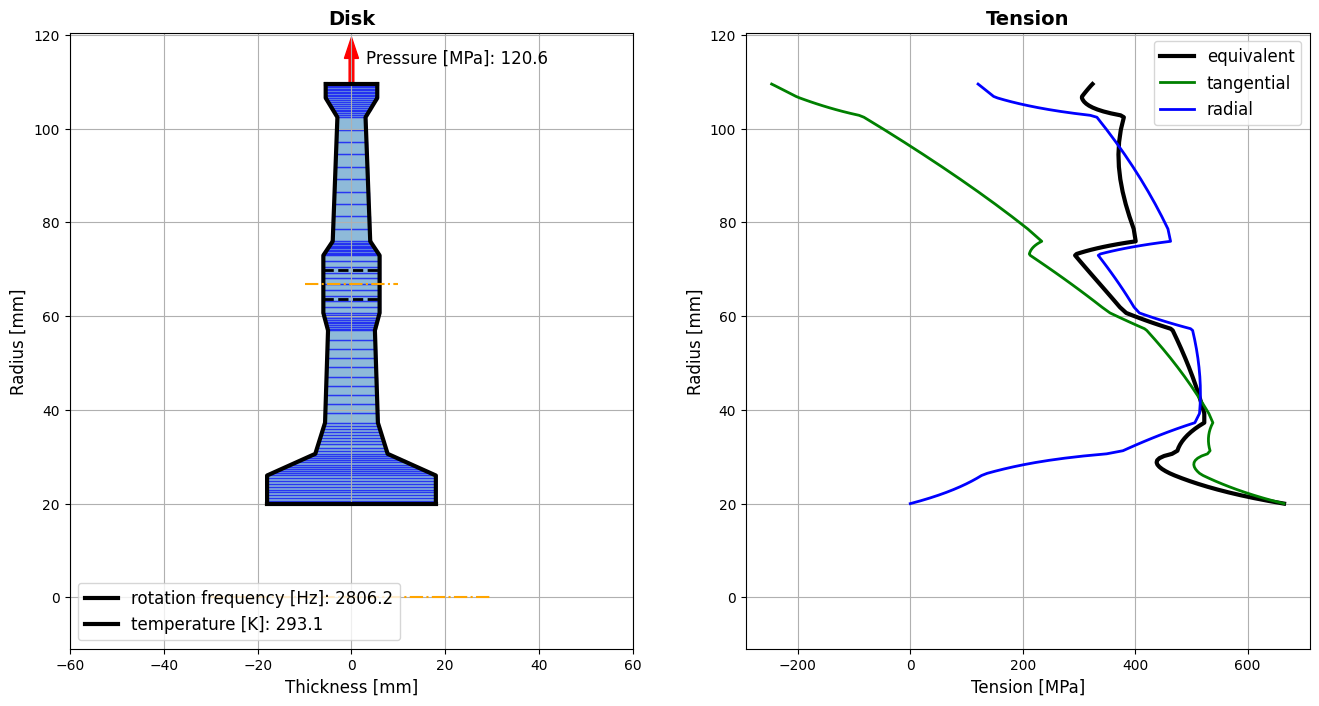


            holes: 0
            nholes []: 5, rholes [mm]: 66.8, dholes [mm]: 6.2
            tension_t [MPa] in (np.float64(512.5422761589398), np.float64(535.8396523479823))
            


In [20]:
tensions = disk.tension(**condition, ndis=10, show=True)

    radius [mm]  thickness [mm]  tension [MPa]   tension_t   tension_r
89   108.599778       11.256086     328.653199 -251.316199  120.600000
88   107.379556       11.512172     322.264305 -235.272455  132.042438
87   106.159333       11.768258     316.201369 -220.437192  141.850619
86   104.939111       12.024343     310.486350 -205.737049  151.406864
85   103.718889       12.280429     305.131138 -191.175332  160.720753
..          ...             ...            ...         ...         ...
4      4.880889       29.672044     441.174112  440.577161  441.768651
3      3.660667       29.708529     441.462254  441.079355  441.844159
2      2.440444       29.745014     441.561377  441.344096  441.778338
1      1.220222       29.781499     441.471419  441.364516  441.578245
0      0.000000       29.817984     441.379150  441.379150  441.379150

[90 rows x 5 columns]


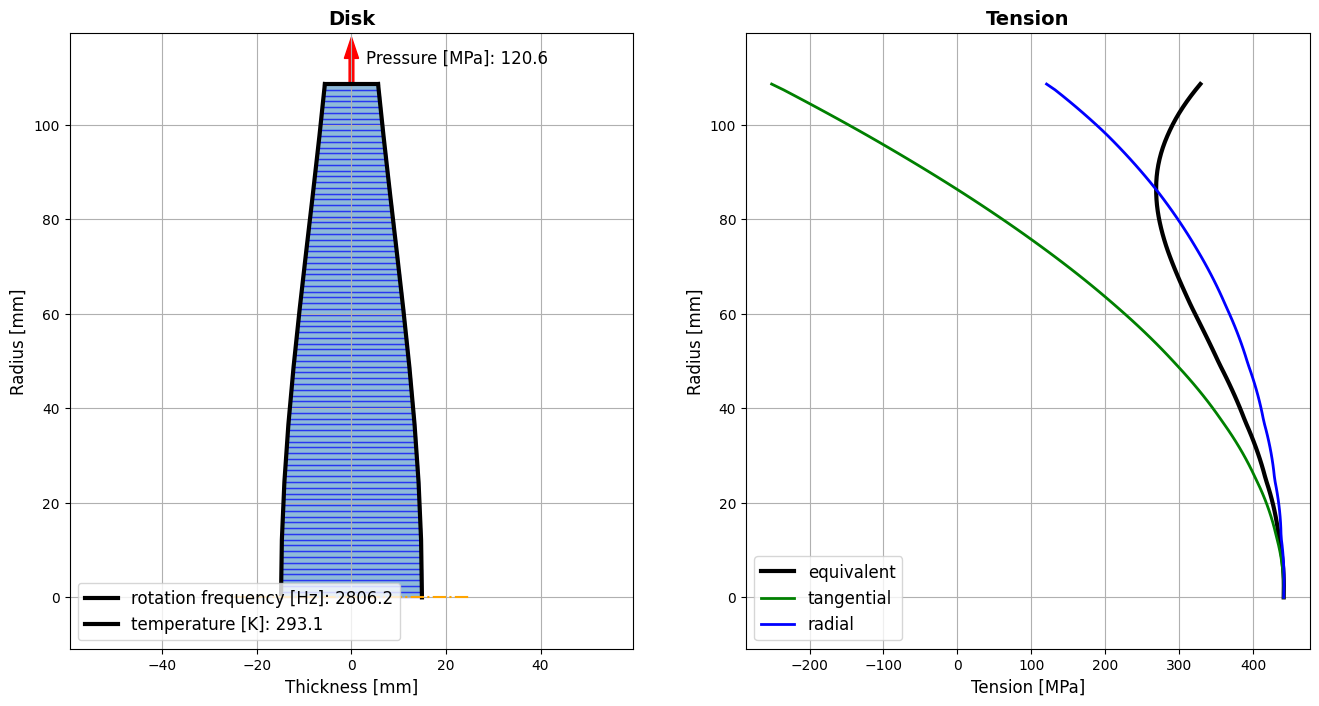

{'radius': array([0.        , 0.00122022, 0.00244044, 0.00366067, 0.00488089,
        0.00610111, 0.00732133, 0.00854156, 0.00976178, 0.010982  ,
        0.01220222, 0.01342244, 0.01464267, 0.01586289, 0.01708311,
        0.01830333, 0.01952356, 0.02074378, 0.021964  , 0.02318422,
        0.02440444, 0.02562467, 0.02684489, 0.02806511, 0.02928533,
        0.03050556, 0.03172578, 0.032946  , 0.03416622, 0.03538644,
        0.03660667, 0.03782689, 0.03904711, 0.04026733, 0.04148756,
        0.04270778, 0.043928  , 0.04514822, 0.04636844, 0.04758867,
        0.04880889, 0.05002911, 0.05124933, 0.05246956, 0.05368978,
        0.05491   , 0.05613022, 0.05735044, 0.05857067, 0.05979089,
        0.06101111, 0.06223133, 0.06345156, 0.06467178, 0.065892  ,
        0.06711222, 0.06833244, 0.06955267, 0.07077289, 0.07199311,
        0.07321333, 0.07443356, 0.07565378, 0.076874  , 0.07809422,
        0.07931444, 0.08053467, 0.08175489, 0.08297511, 0.08419533,
        0.08541556, 0.08663578, 0.0878

In [23]:
eq_radius, eq_thickness = disk.equal_strength(400 * 10 ** 6, condition["rotation_frequency"], ndis=10, show=False).values()
Disk(material=disk.material, radius=eq_radius, thickness=eq_thickness).tension(**condition, ndis=10, show=True)

In [25]:
disk.frequency_safety_factor(condition["rotation_frequency"], temperature=600, pressure=pressure)

((np.float64(1.8108353315127532), np.float64(1.9114372943745725)), '')

In [26]:
disk.natural_frequencies(-1, 0, 0)

(np.float64(2914.4035924609007), '1/s')

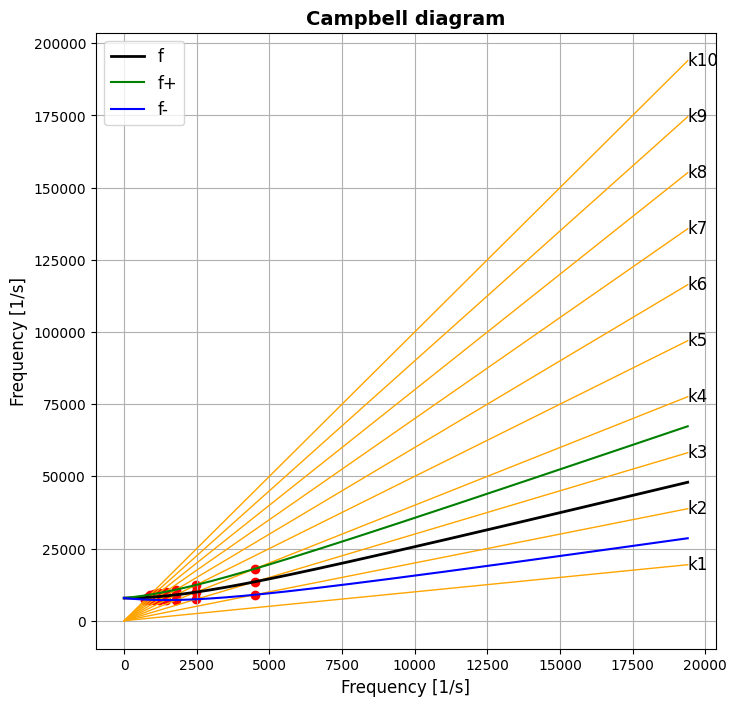

([np.float64(731.283271),
  np.float64(808.815658),
  np.float64(905.427335),
  np.float64(1029.503525),
  np.float64(1195.480158),
  np.float64(1430.891527),
  np.float64(1797.138136),
  np.float64(2474.263333),
  np.float64(4491.372034)],
 '1/s')

In [27]:
disk.campbell_diagram(0, 1, 1, condition["rotation_frequency"] * 1.1, k=arange(1, 10+1, 1))